# ALLEN CAHN PHASE FIELD EQUATION SOLVER : 2D

Importing the required library

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Define the Physical parameters

In [2]:
h = 1                 # Grid size in x and y directions
N = 64                # Grid Dimension in x and y directions
L = N * h             # Boundary Dimension
k = 1                 # Relaxation rate
eps = 4               # Gradient Energy
U = 1                 # Free Energy Multiplier
a = 0.01              # Initialization parameter

Defining the arrays representing grid space in x and y directions

In [3]:
x = np.arange(64)     # Defining an array to store grid points in x direction
y = x                 # Defining an array to store grid points in x direction

Defining the time step size and no of time steps

In [4]:
dt = 0.001            # Defining the time step size
nsteps = 5000         # Defining the no of time steps

Defining the functions to compute the bulk free energy density 

$$ f(\phi) = U(\phi- 1)^2(\phi + 1)^2 $$

In [5]:
def f(xi): return np.square(xi - 1) * np.square(xi + 1)

Defining the function to compute the first derivative of the free energy function w.r.t $\phi$

$$ \frac{\partial f(\phi)}{\partial \phi} = 4U\phi(\phi^2 - 1) $$

In [6]:
def f1(xj): return 4 * xj * (np.square(xj) - 1)

Initializing the phase field distribution

Filling the phase field array phi with random numbers between -a/2 and a/2

In [7]:
phi = np.random.uniform(low=-a / 2, high=a / 2, size=(N, N))

Defining arrays for applying the Periodic boundary conditions

$$\phi(x, y) = \phi(x + L, y) = \phi(x, y + L)$$

In [8]:
plus = np.append(np.arange(1, N), 0)
minus = np.append(N - 1, np.arange(0, N - 1))

 Initializing an array to store the value of free energy functional over time

In [9]:
Fplot = np.arange(nsteps)

## Allen Cahn phase field evolution equation
Solving the Allen Cahn phase field equation

$$\frac{\partial \phi}{\partial t} = -k\frac{\delta F[\phi]}{\delta \phi}
                                    = -k[\frac{\partial f}{\partial \phi} - 2\epsilon\nabla^2\phi]$$

## Laplacian approximation using Central Difference method
Using Central difference Method to compute the numerical approximation of the Laplacian of phase field in 2D

$$\nabla^2\phi = \frac{\phi(x + h, y) + \phi(x, y + h) + \phi(x - h, y) + \phi(x, y - h) - 4\phi(x, y) }{h^2}$$



## Derivative approximation using Central Difference method
Derivative of phase field in x direction, using Central Difference Method, with Periodic boundary conditions


$$\frac{\partial f}{\partial x} = \frac{\phi(x + h, y) - \phi(x - h, y)}{2h}$$ 



Derivative of phase field in y direction, using Central Difference Method, with Periodic Boundary conditions 

$$\frac{\partial f}{\partial y} = \frac{\phi(x, y + h) - \phi(x, y - h)}{2h}$$



## Free energy functional 

Computing the numerical approximation of free energy functional in 2D

$$F[\phi(x, y)] = \int_{V} [f(\phi(x, y)) + \epsilon |\nabla \phi(x, y)|^2] dV $$

Here $\phi$ is a two diemnsional function, i.e. $\phi(x, y)$. So gradient of $\phi(x, y)$ will have two components
$\frac{\partial \phi(x, y)}{x}$ and $\frac{\partial \phi(x, y)}{y}$.

Using this we get the norm of the gradient of the phase fiel as
$$|\nabla \phi(x, y)| = \sqrt{\left(\frac{\partial \phi(x, y)}{x}\right)^2 + \left(\frac{\partial \phi(x, y)}{y}\right)^2}$$


## Variation of free energy functional
Computing variation of F with respect to $\phi$

$$\frac{\delta F[\phi]}{\delta \phi}
                                    = [\frac{\partial f}{\partial \phi} - 2\epsilon\nabla^2\phi]$$

## Evolution equation

Computing evolution of the phase field using Allen-Cahn equation

$$ \phi(x, y; t + \Delta t) = \phi(x, y; t) - k\frac{\partial f}{\partial \phi} + \frac{2k\epsilon\Delta t}{h^2}[\phi(x + h, y; t) + \phi(x, y + h; t) + \phi(x - h, y; t) + \phi(x, y - h; t) - 4\phi(x, y; t)]$$

In [10]:
for i in range(nsteps):

    # Defining a function to compute numerical approximation of Laplacian of phase field in 2D using Central Difference method

    def laplacephi(phi): return (phi[:, plus] + phi[:, minus] + phi[plus, :] + phi[minus, :] - 4 * phi) / (h * h)

    # Derivative of phase field in x direction : dphi/dx, using Central Difference Method

    def phidx(phi) : return (phi[:, plus] - phi[:, minus]) / (2 * h)

    # Derivative of phase field in y direction : dphi/dy, using Central Difference Method

    def phidy(phi): return (phi[plus, :] - phi[minus, :]) / (2 * h)

    # Computing the numerical approximation of free energy functional in 2D

    F = sum(sum(f(phi))) * U + sum(sum(np.square(phidx(phi)) + np.square(phidy(phi)))) * eps

    # Storing the Free energy functional value for plotting

    Fplot[i] = F

    # Computing variation of F with respect to phi : dF/dphi

    Fdphi = f1(phi) * U - 2 * eps * laplacephi(phi)

    # Computing evolution of the phase field using Allen-Cahn equation

    phi = phi - k * dt * Fdphi  

## Plotting the final phase field distribution

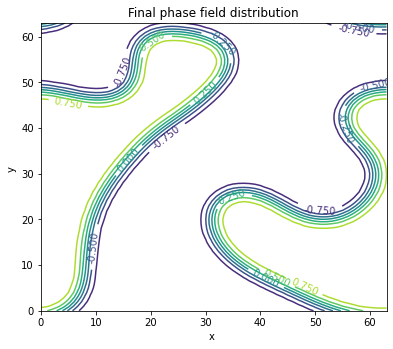

In [11]:
plt.close('all')

fig = plt.figure(figsize=(6, 5))
left, bottom, width, height = 0.1, 0.1, 0.8, 0.8
ax = fig.add_axes([left, bottom, width, height])

X, Y = np.meshgrid(x, y)

cp = ax.contour(X, Y, phi)
ax.clabel(cp, inline=True,
              fontsize=10)
ax.set_title('Final phase field distribution')
ax.set_xlabel('x ')
ax.set_ylabel('y ')
plt.show()

## Plotting the Free energy functional over time

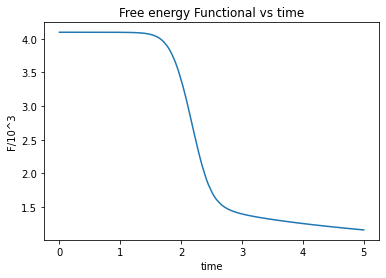

In [12]:
plt.close('all')

t = np.arange(nsteps)
plt.plot(t/1000, Fplot/1000)
plt.title("Free energy Functional vs time")
plt.xlabel("time")
plt.ylabel("F/10^3")
plt.show()